In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
data=pd.read_csv('/content/Final_dataset.csv')

In [3]:
data.head()

,Sno,Ward Name,Latitude,Longitude,Distance from Adyar River(km),Distance from Cooum River(km),Distance from Kosasthalaiyar River(km),Elevation,Rainfall (in cm),Water Level(feet)
0,1,KATHIVAKKAM,13.216133,80.318177,33.72,55.67,66.25,16,24.09,9.00
1,2,ENNORE,13.214600,80.320300,62.88,19.21,32.94,12,30.85,8.23
2,3,ERNAVOOR,13.189600,80.303900,15.91,62.97,14.27,20,23.11,10.00
3,4,AJAX,13.172100,80.305100,59.61,40.64,23.18,13,16.37,5.00
4,5,TIRUVOTTRIYUR,13.164300,80.300100,13.82,61.12,20.09,16,16.62,8.00


In [6]:
data.columns

Index(['Sno', ' Ward Name', 'Latitude', 'Longitude',
       'Distance from Adyar River(km)', 'Distance from Cooum River(km)',
       'Distance from Kosasthalaiyar River(km)', 'Elevation',
       'Rainfall (in cm)', 'Water Level(feet)'],
      dtype='object')

In [7]:
data.describe()

,Sno,Latitude,Longitude,Distance from Adyar River(km),Distance from Cooum River(km),Distance from Kosasthalaiyar River(km),Elevation,Rainfall (in cm),Water Level(feet)
count,200.000000,197.000000,197.000000,199.000000,199.000000,199.000000,200.000000,200.000000,200.000000
mean,100.500000,11.695948,71.249964,39.207487,40.060804,41.212965,15.735000,21.474150,9.089050
std,57.879185,4.393748,25.138027,19.445838,18.939417,18.514302,5.125047,5.230115,3.508543
min,1.000000,0.000000,0.000000,8.270000,8.560000,8.340000,7.000000,12.570000,2.000000
25%,50.750000,12.984200,80.164800,21.355000,21.960000,23.700000,11.000000,16.867500,6.000000
50%,100.500000,13.073200,80.218000,40.280000,41.260000,41.720000,15.000000,20.910000,9.000000
75%,150.250000,13.110300,80.256200,57.020000,58.020000,58.400000,20.000000,25.880000,12.000000
max,200.000000,32.243200,80.320300,68.970000,67.920000,69.830000,25.000000,30.890000,15.000000


***DATA PREPROCESSING***

In [8]:
data.isnull().sum()

,0
Sno,0
Ward Name,0
Latitude,3
Longitude,3
Distance from Adyar River(km),1
Distance from Cooum River(km),1
Distance from Kosasthalaiyar River(km),1
Elevation,0
Rainfall (in cm),0
Water Level(feet),0


In [9]:
data.drop(data.index[(data[" Ward Name"] == "4TH MAIN RD")],axis=0,inplace=True)

In [10]:
data.isnull().sum()

,0
Sno,0
Ward Name,0
Latitude,3
Longitude,3
Distance from Adyar River(km),1
Distance from Cooum River(km),1
Distance from Kosasthalaiyar River(km),1
Elevation,0
Rainfall (in cm),0
Water Level(feet),0


In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

,0
Sno,0
Ward Name,0
Latitude,0
Longitude,0
Distance from Adyar River(km),0
Distance from Cooum River(km),0
Distance from Kosasthalaiyar River(km),0
Elevation,0
Rainfall (in cm),0
Water Level(feet),0


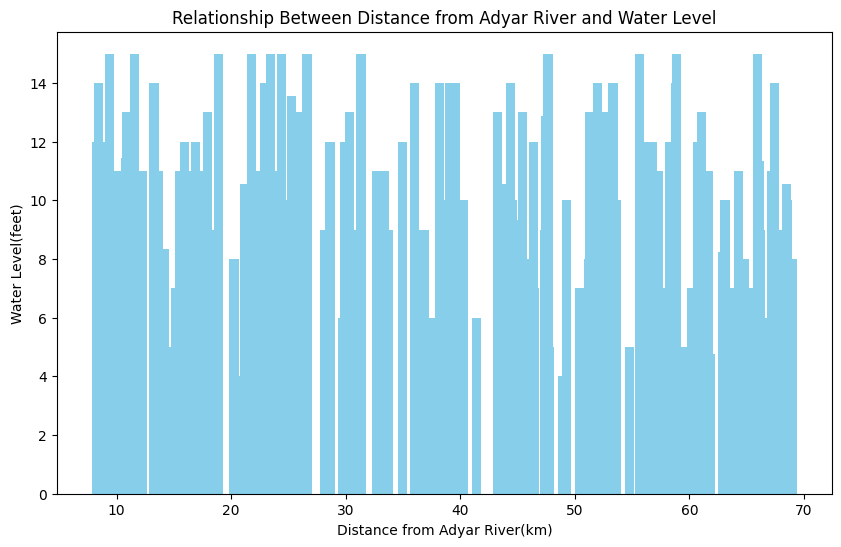

In [13]:
import matplotlib.pyplot as plt

# Extracting the feature values from your dataset
distances = data['Distance from Adyar River(km)']
water_levels = data['Water Level(feet)']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(distances, water_levels, color='skyblue')

# Adding labels and title
plt.xlabel('Distance from Adyar River(km)')
plt.ylabel('Water Level(feet)')
plt.title('Relationship Between Distance from Adyar River and Water Level')

# Show the plot
plt.show()


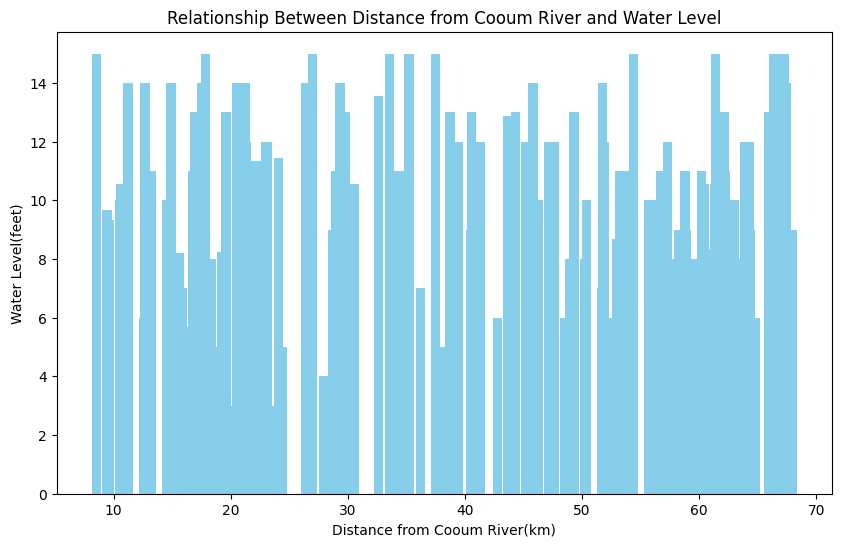

In [14]:
import matplotlib.pyplot as plt

# Extracting the feature values from your dataset
distances = data['Distance from Cooum River(km)']
water_levels = data['Water Level(feet)']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(distances, water_levels, color='skyblue')

# Adding labels and title
plt.xlabel('Distance from Cooum River(km)')
plt.ylabel('Water Level(feet)')
plt.title('Relationship Between Distance from Cooum River and Water Level')

# Show the plot
plt.show()

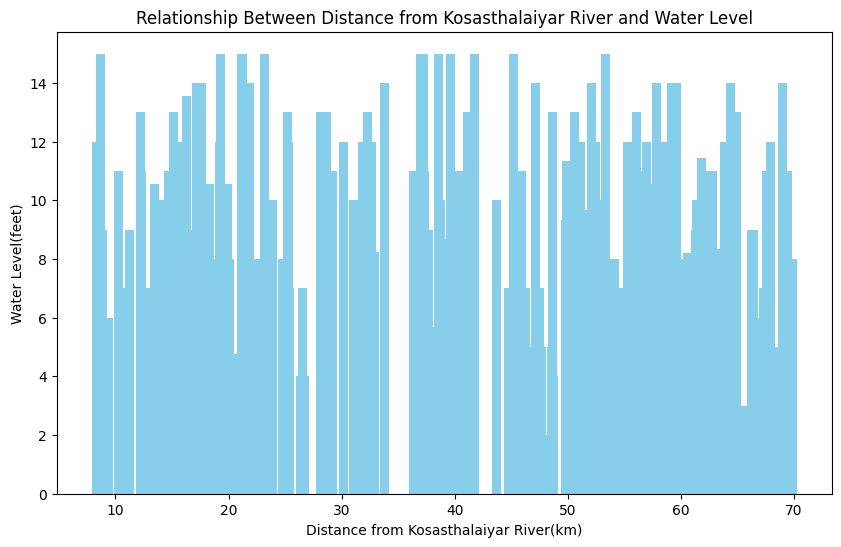

In [15]:
import matplotlib.pyplot as plt

# Extracting the feature values from your dataset
distances = data['Distance from Kosasthalaiyar River(km)']
water_levels = data['Water Level(feet)']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(distances, water_levels, color='skyblue')

# Adding labels and title
plt.xlabel('Distance from Kosasthalaiyar River(km)')
plt.ylabel('Water Level(feet)')
plt.title('Relationship Between Distance from Kosasthalaiyar River and Water Level')

# Show the plot
plt.show()

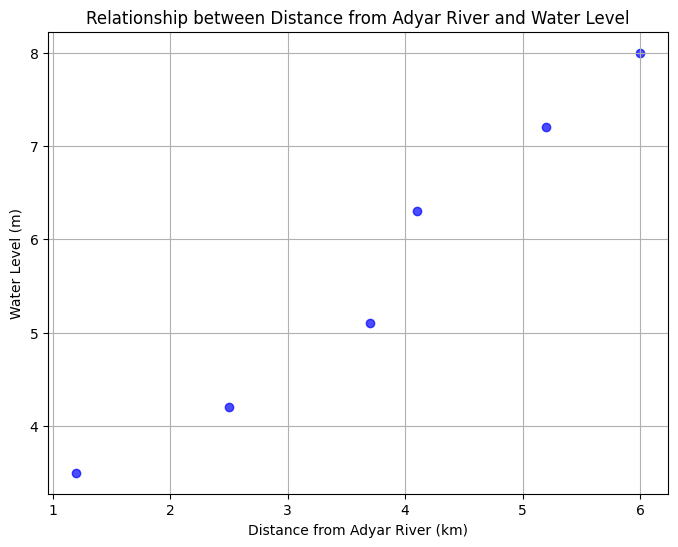

In [16]:
import matplotlib.pyplot as plt

# Sample data for Distance from Adyar River and Water Level
distance_from_adyar_river = [1.2, 2.5, 3.7, 4.1, 5.2, 6.0]  # Example distance values in kilometers
water_level = [3.5, 4.2, 5.1, 6.3, 7.2, 8.0]  # Example water level values in meters

# Create a scatter plot for Distance from Adyar River vs. Water Level
plt.figure(figsize=(8, 6))
plt.scatter(distance_from_adyar_river, water_level, color='blue', alpha=0.7)
plt.title('Relationship between Distance from Adyar River and Water Level')
plt.xlabel('Distance from Adyar River (km)')
plt.ylabel('Water Level (m)')
plt.grid(True)
plt.show()


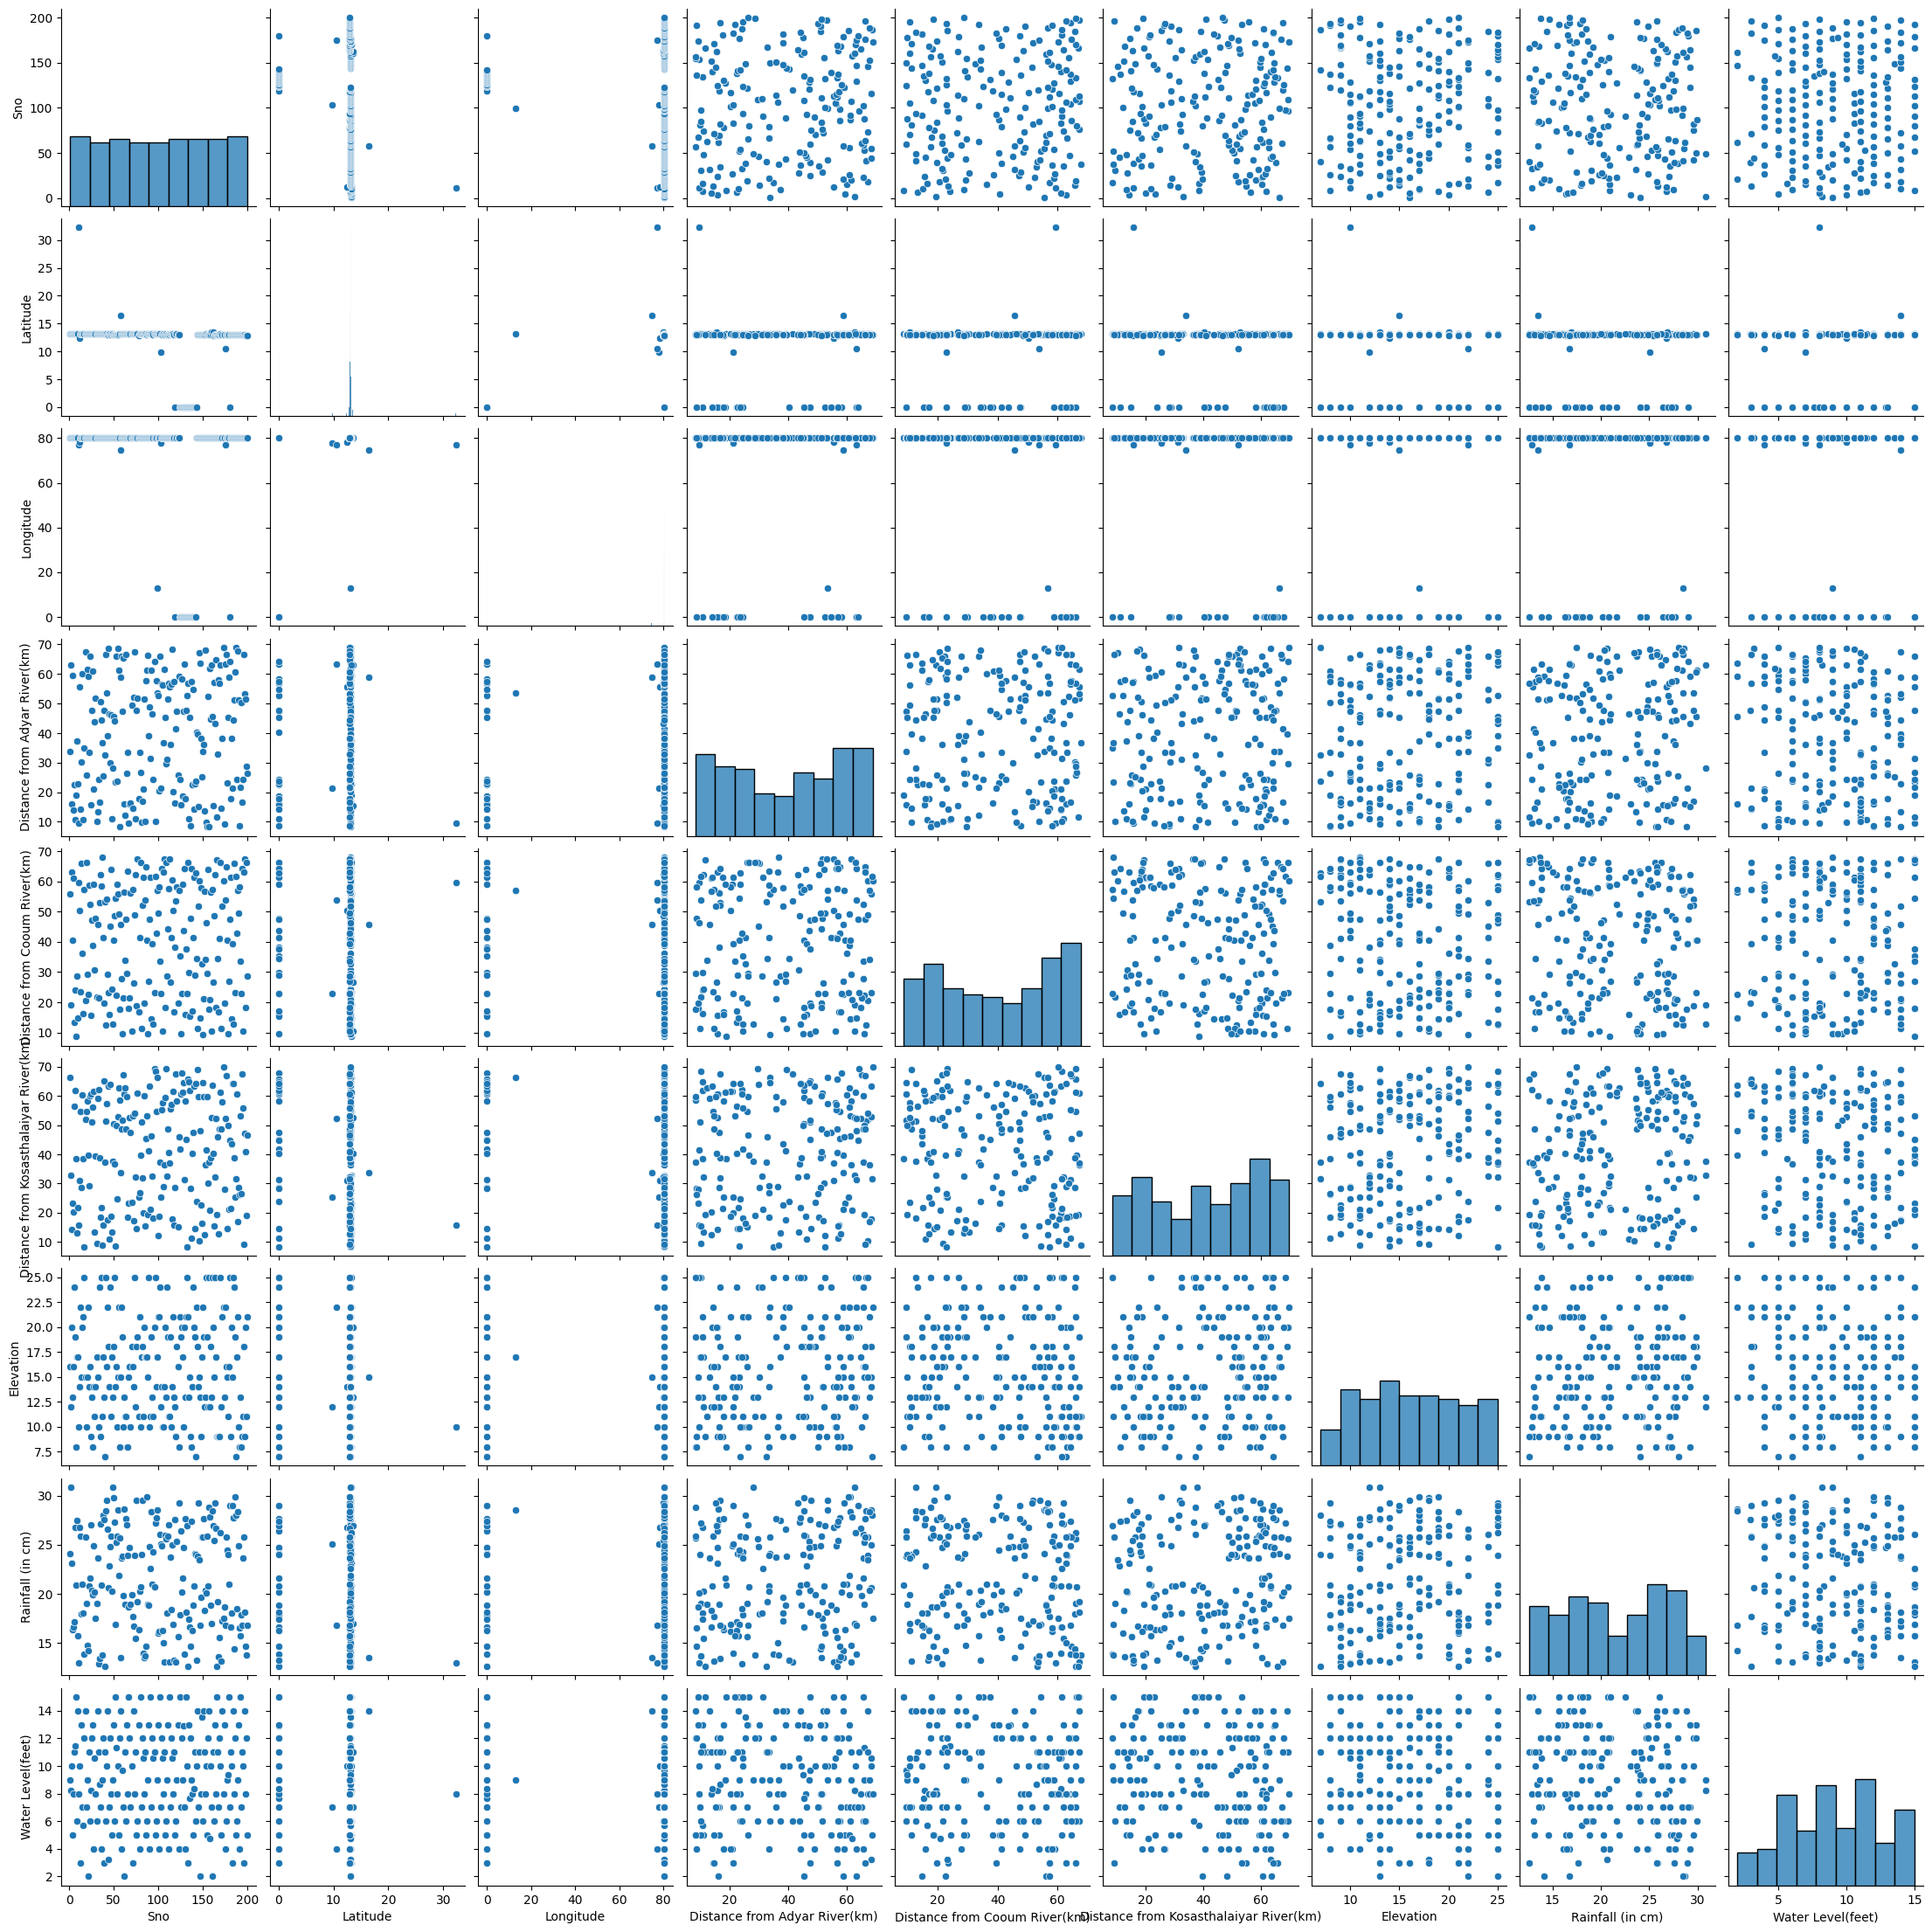

In [17]:
sns.pairplot(data)
plt.show()


In [18]:
X = data[['Distance from Adyar River(km)', 'Distance from Cooum River(km)', 'Distance from Kosasthalaiyar River(km)', 'Elevation', 'Rainfall (in cm)']]
y = data['Water Level(feet)']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
tree_model = DecisionTreeRegressor(random_state=42)

In [21]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
forest_model = RandomForestRegressor(random_state=42)

In [23]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
boosting_model = GradientBoostingRegressor(random_state=42)

In [25]:
boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [26]:
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)
boosting_preds = boosting_model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, tree_preds)
print("\nMean Absolute Error (MAE) (Decision Tree):", mae)
mse = mean_squared_error(y_test, tree_preds)
print("Mean Squared Error (Decision Tree):", mse)


Mean Absolute Error (MAE) (Decision Tree): 4.22475
Mean Squared Error (Decision Tree): 26.9159225


In [28]:
mae = mean_absolute_error(y_test, forest_preds)
print("\nMean Absolute Error (MAE) of Random Forest:", mae)
mse = mean_squared_error(y_test, forest_preds)
print("Mean Squared Error (Meta-Model) of Random Forest:", mse)


Mean Absolute Error (MAE) of Random Forest: 3.5914975
Mean Squared Error (Meta-Model) of Random Forest: 16.770501782750003


In [29]:
mae = mean_absolute_error(y_test, boosting_preds)
print("\nMean Absolute Error (MAE) of Gradient boosting :", mae)
mse = mean_squared_error(y_test, boosting_preds)
print("Mean Squared Error of Gradient Boosting:", mse)


Mean Absolute Error (MAE) of Gradient boosting : 3.663811402401471
Mean Squared Error of Gradient Boosting: 18.085988269097335


In [30]:
meta_X = np.column_stack((tree_preds, forest_preds, boosting_preds))
meta_model = LinearRegression()
meta_model.fit(meta_X, y_test)

LinearRegression()

In [31]:
meta_features_train = np.column_stack((tree_model.predict(X_train),
                                       forest_model.predict(X_train),
                                       boosting_model.predict(X_train)))

In [32]:
meta_model.fit(meta_features_train, y_train)

LinearRegression()

In [33]:
meta_features_test = np.column_stack((tree_preds, forest_preds, boosting_preds))
meta_predictions = meta_model.predict(meta_features_test)

In [34]:
mae = mean_absolute_error(y_test, meta_predictions)
print("\nMean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, meta_predictions)
print("Mean Squared Error (Meta-Model):", mse)


Mean Absolute Error (MAE): 4.22475
Mean Squared Error (Meta-Model): 26.9159225


In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Optional: Regularization with dropout
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 55.9420 - mae: 6.4058 - val_loss: 39.8511 - val_mae: 5.0188
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 32.8178 - mae: 4.5463 - val_loss: 51.8984 - val_mae: 5.9080
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 38.4263 - mae: 4.8595 - val_loss: 30.4181 - val_mae: 4.4380
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30.7144 - mae: 4.4351 - val_loss: 20.2681 - val_mae: 3.6239
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 28.0649 - mae: 4.2853 - val_loss: 19.1525 - val_mae: 3.4998
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24.4654 - mae: 3.8568 - val_loss: 20.8169 - val_mae: 3.7372
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.2506 - mae: 4.1765 - val_loss: 23.7931 - val_mae: 3.9590
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.1700 - mae: 3.8968 - val_loss: 20.8864 - val_mae: 3.7449
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.1053 - mae: 4.1

In [36]:
# Evaluate the model on the validation data
loss, mae = model.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22.6348 - mae: 4.1546 
Validation Loss: 22.610502243041992, Validation MAE: 4.1414642333984375


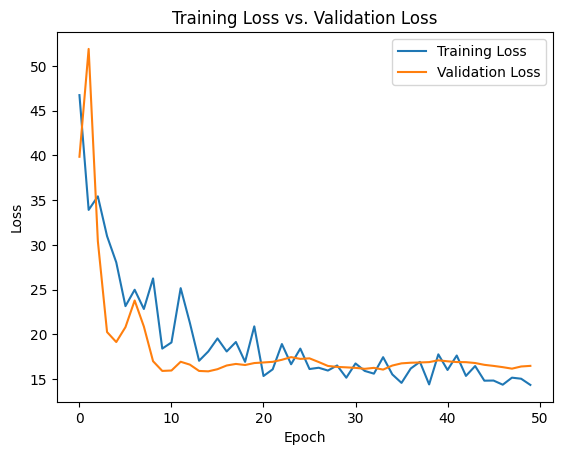

In [37]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.show()


In [42]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, y_pred)
mae = mae_metric.result().numpy()

mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, y_pred)
mse = mse_metric.result().numpy()

print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")


Test MAE: 4.1414642333984375
Test MSE: 22.61050033569336


In [39]:
import folium
import pandas as pd

m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
for index, row in data.iterrows():
    if row["Water Level(feet)"] > 5:
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Ward {row['Sno']}: {row[' Ward Name']}",
            icon=folium.Icon(color="red", icon="info-sign"),
        ).add_to(m)

m.save("wards_water_level_gt_5_map.html")

In [40]:
import folium
import pandas as pd

m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
for index, row in data.iterrows():
    if row["Water Level(feet)"] > 2 and row["Water Level(feet)"] <= 4:
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Ward {row['Sno']}: {row[' Ward Name']}",
            icon=folium.Icon(color="orange", icon="info-sign"),
        ).add_to(m)

m.save("wards_water_level_gt_2_4_map.html")